In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [2]:
# Store filepath in a variable
file_one = "output_data/us-states.txt"
us_states = pd.read_csv(file_one)

In [3]:
grouped = us_states.groupby(['state'])

In [4]:
max_cases = grouped['cases'].max()

In [5]:
remove_terr = pd.DataFrame(max_cases) 
fifty_states = remove_terr.drop(['Guam', 'Puerto Rico', 'Northern Mariana Islands', 'Virgin Islands', 'District of Columbia', 'Alaska', 'Hawaii'])

In [6]:
index_update = fifty_states.reset_index()
# index_update.head()

In [7]:
rename_column = index_update.rename(columns={"state": "NAME", "cases":"Max_cases"})
# rename_column.head()

In [8]:
file_two = "output_data/States.csv"
state_info = pd.read_csv(file_two)
# state_info.head()

In [9]:
merge_state_dfs = pd.merge(rename_column, state_info, on="NAME", how="left")
# merge_state_dfs.head()

In [10]:
merge_state_dfs.to_csv(r'output_data/state_data_new.csv', index=False)

In [11]:
file_path = "mapping/us_nation/cb_2018_us_state_20m.shp"
usa_map = gpd.read_file(file_path)
# type(usa_map)

In [12]:
# usa_map.head()

In [13]:
#Drop AK and HI
lower_48 = usa_map.loc[~usa_map['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

In [14]:
#Read csv file
# Store filepath in a variable
file_three = "output_data/state_data_new.csv"
states_info = pd.read_csv(file_three)

In [15]:
#Merge state data with shape file
merge_data=usa_map.merge(states_info,on='NAME')
#merge_data

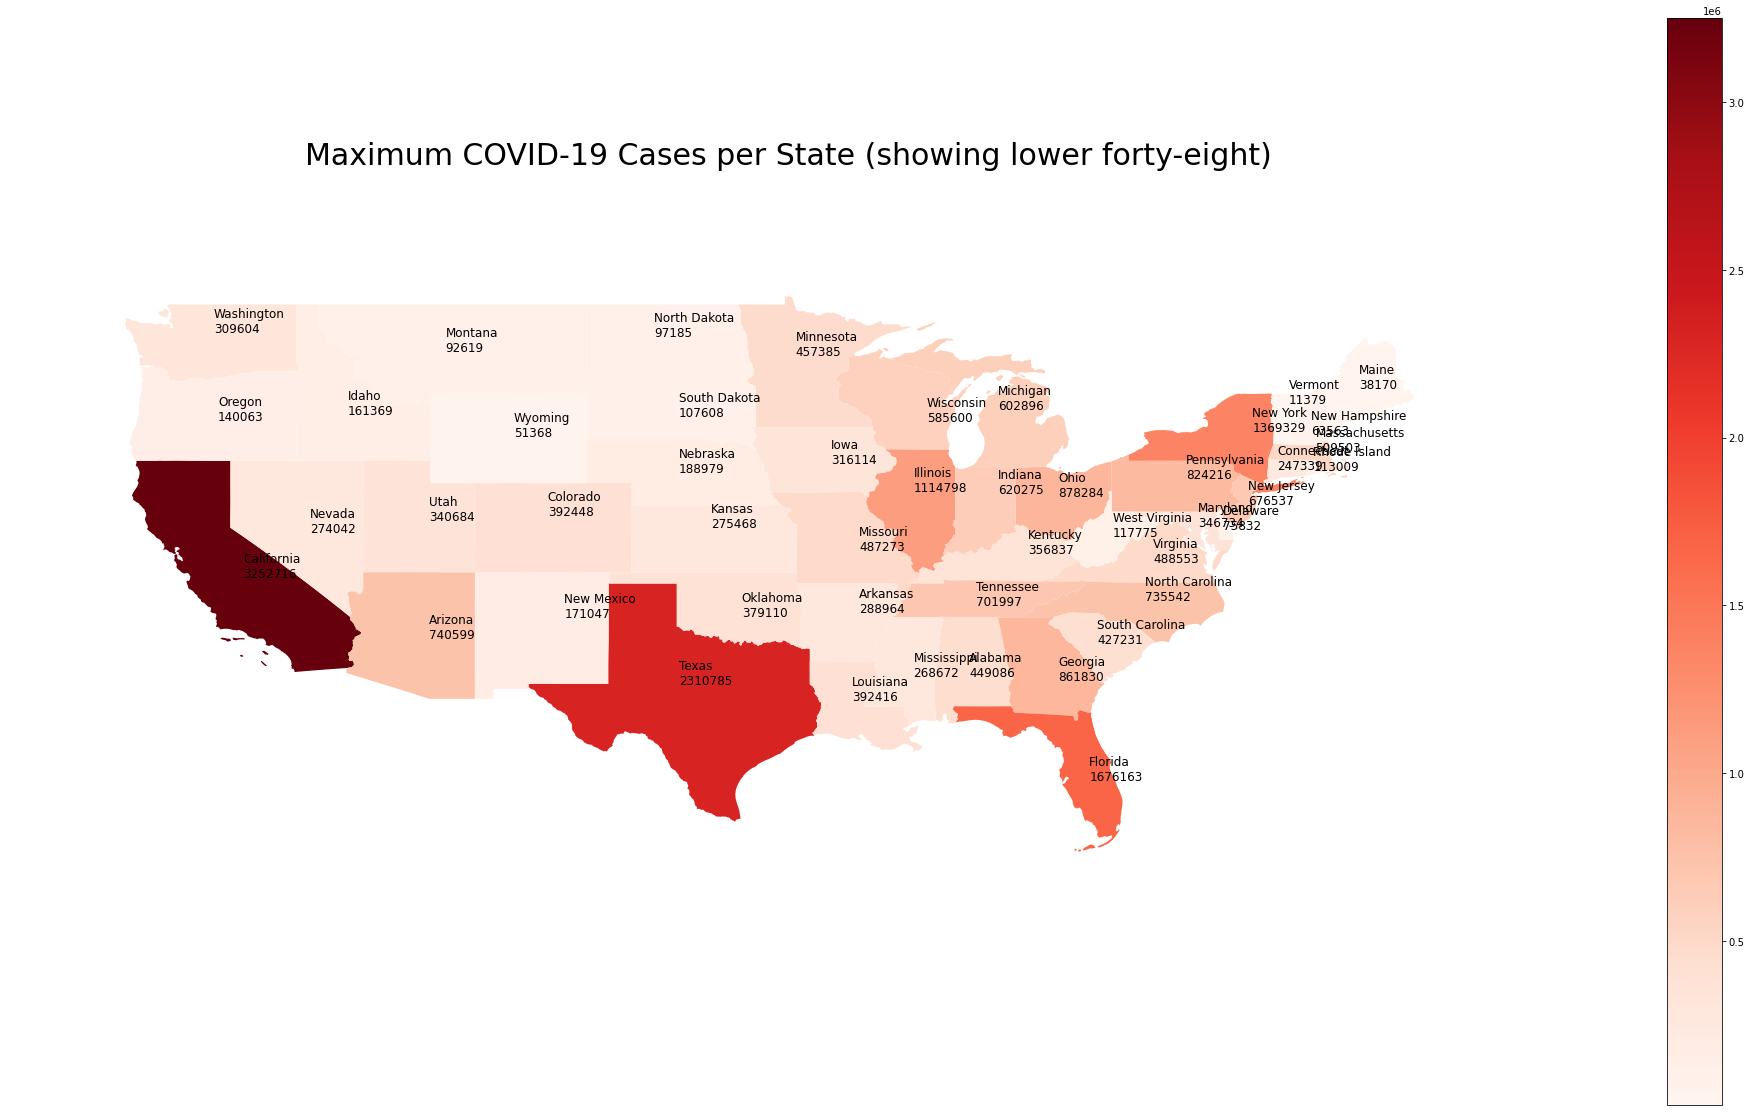

In [25]:
#Attempt
ax = merge_data.plot(column='Max_cases',figsize=(35, 20),cmap='Reds',legend=True)
plt.xlim(-130,-60)
plt.ylim(20,55)

#Include state names and state codes
for abbr in range(len(merge_data)):
    plt.text(merge_data.lng[abbr],
             merge_data.lat[abbr],
             "{}\n{}".format(merge_data.NAME[abbr],
             merge_data.Max_cases[abbr]),size=12)
plt.title('Maximum COVID-19 Cases per State (showing lower forty-eight)',fontsize=30)
ax.axis('off')
plt.show()